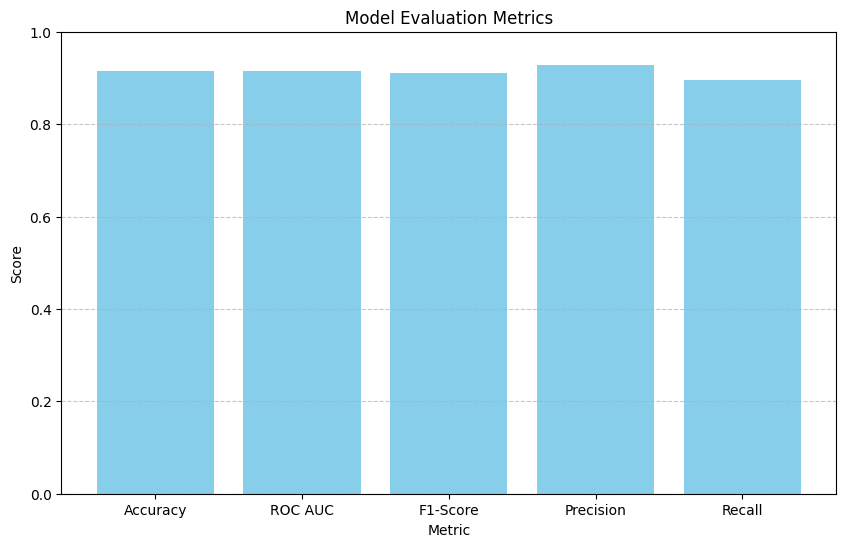

In [ ]:
import matplotlib.pyplot as plt

# Define evaluation metrics
metrics = ['Accuracy', 'ROC AUC', 'F1-Score', 'Precision', 'Recall']
scores = [accuracy, roc_auc, f1, precision, recall]

# Plot the results
plt.figure(figsize=(10, 6))
plt.bar(metrics, scores, color='skyblue')
plt.title('Model Evaluation Metrics')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.ylim(0, 1)  # Set y-axis limit to be between 0 and 1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


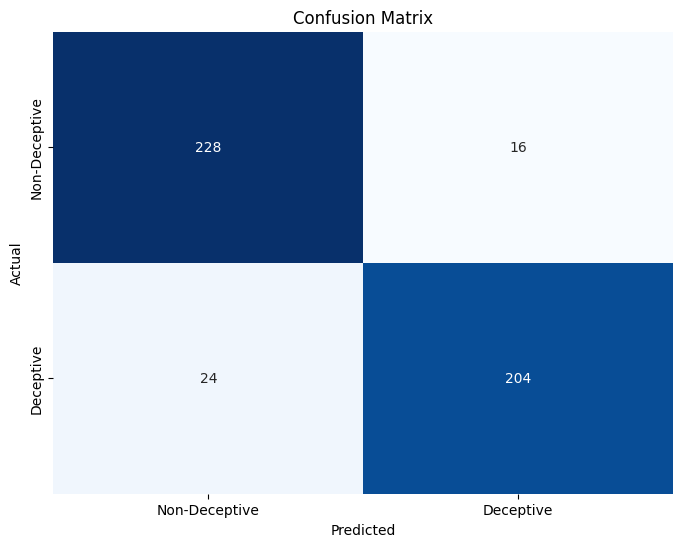

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define class labels
class_labels = ['Non-Deceptive', 'Deceptive']

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
import xgboost as xgb
import pickle
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score

# Function to scrape text from a given URL
def scrape_text_from_url(url):
    try:
        response = requests.get(url)
        soup = BeautifulSoup(response.text, 'html.parser')
        text = ' '.join([p.get_text() for p in soup.find_all('p')])
        return text
    except Exception as e:
        print(f"Error while scraping: {str(e)}")
        return None

# Load the dataset
df = pd.read_csv("/content/dataset.csv")

# Split the dataset into features (X) and labels (y)
X = df['text']
y = df['label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Oversampling with SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf, y_train)

# XGBoost model with hyperparameter tuning
model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', random_state=42, n_estimators=2000, max_depth=5, learning_rate=0.05)
model.fit(X_train_resampled, y_train_resampled)

# Save the trained model and vectorizer
with open('xgboost_model.pkl', 'wb') as f:
    pickle.dump(model, f)

with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

# Load the trained model and vectorizer
with open('xgboost_model.pkl', 'rb') as f:
    model = pickle.load(f)

with open('vectorizer.pkl', 'rb') as f:
    vectorizer = pickle.load(f)

# Evaluate the model
y_pred = model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Evaluation Metrics with Modifications:")
print(f"Accuracy: {accuracy:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

# Example usage
url = "https://www.luluandsky.com"
text = scrape_text_from_url(url)
if text is not None:
    text_vector = vectorizer.transform([text])
    prediction = model.predict(text_vector)[0]
    print(f"Sample: {text}")
    print(f"Predicted Class: {'Deceptive' if prediction == 1 else 'Non-Deceptive'}")